# تمرین 2 بخش پیاده سازی

## بخش 1

In [129]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data = load_breast_cancer()
x = data.data  
y = data.target  

x_frame = pd.DataFrame(x, columns=data.feature_names)

In [130]:
x_frame.head(20)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750


In [131]:
x_frame.shape

(569, 30)

In [132]:
x_frame.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

In [133]:
class_0 = x[y == 0]  
class_1 = x[y == 1] 





## بخش دوم

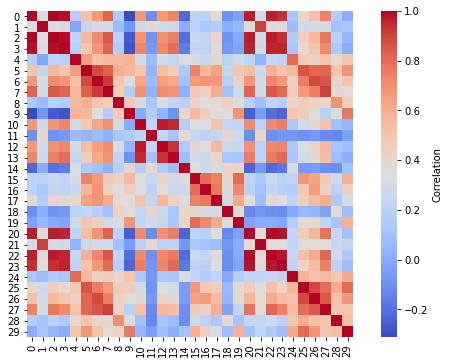

In [134]:
import matplotlib.pyplot as plt
import seaborn as sns

def mean(data):
    sum_data = 0
    count = 0
    for v in data:
        sum_data += v
        count += 1
    mean = sum_data / count
    return mean

def variance(data,mean):
      return sum((x - mean) ** 2 for x in data) / (len(data) - 1)
def covar(x1, x2):
    mean_x1= mean(x1)
    mean_x2 = mean(x2)
    covariance = sum((xi - mean_x1) * (yi - mean_x2) for xi, yi in zip(x1, x2)) / (len(x1) - 1)
    return covariance

def covar_matrix(data):
    cov_matrix = []
    for i in range(len(data[0])):
        row = []
        for j in range(len(data[0])):
            cov_ij = covar([a[i] for a in data], [a[j] for a in data])
            row.append(cov_ij)
        cov_matrix.append(row)
    
    return cov_matrix

def correlation_matrix(cov_matrix):
    corr_matrix = []
    for i in range(len(cov_matrix)):
        row = []
        for j in range(len(cov_matrix)):
            if i == j:
                row.append(1) 
            else:
                std_i = (cov_matrix[i][i]) ** 0.5
                std_j = (cov_matrix[j][j]) ** 0.5
                corr = cov_matrix[i][j] / (std_i * std_j)
                row.append(corr)
        corr_matrix.append(row)        
    
    return corr_matrix


cov_matrix = covar_matrix(x)
corr_matrix = correlation_matrix(cov_matrix)

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', square=True, cbar_kws={"label": "Correlation"})
plt.show()


In [135]:
mean_0 = mean(class_0)
mean_1 = mean(class_1)
print(f"mean_0: {mean_0}")
print(f"mean_1: {mean_1}")
variance_0 = sum((x - mean_0) ** 2 for x in class_0) / (len(class_0) - 1)
variance_1 = sum((x - mean_1) ** 2 for x in class_1) / (len(class_1) - 1)
print(f"variance_0: {variance_0}")
print(f"variance_1: {variance_1}")

mean_0: [1.74628302e+01 2.16049057e+01 1.15365377e+02 9.78376415e+02
 1.02898491e-01 1.45187783e-01 1.60774717e-01 8.79900000e-02
 1.92908962e-01 6.26800943e-02 6.09082547e-01 1.21091462e+00
 4.32392925e+00 7.26724057e+01 6.78009434e-03 3.22811651e-02
 4.18240094e-02 1.50604717e-02 2.04724009e-02 4.06240566e-03
 2.11348113e+01 2.93182075e+01 1.41370330e+02 1.42228632e+03
 1.44845236e-01 3.74824104e-01 4.50605566e-01 1.82237311e-01
 3.23467925e-01 9.15299528e-02]
mean_1: [1.21465238e+01 1.79147619e+01 7.80754062e+01 4.62790196e+02
 9.24776471e-02 8.00846218e-02 4.60576210e-02 2.57174062e-02
 1.74185994e-01 6.28673950e-02 2.84082353e-01 1.22038011e+00
 2.00032129e+00 2.11351485e+01 7.19590196e-03 2.14382465e-02
 2.59967356e-02 9.85765266e-03 2.05838067e-02 3.63605126e-03
 1.33798011e+01 2.35150700e+01 8.70059384e+01 5.58899440e+02
 1.24959496e-01 1.82672549e-01 1.66237723e-01 7.44443445e-02
 2.70245938e-01 7.94420728e-02]
variance_0: [1.02654308e+01 1.42843929e+01 4.77625870e+02 1.353783

In [136]:
def standardize(data):
    means = mean(data)
    variance = sum((x - means) ** 2 for x in data) / (len(data) - 1)
    std_dev = variance ** 0.5
    return [(x - means) / std_dev for x in data]

standardized_x = standardize(x)



In [137]:
standardized_df = pd.DataFrame(standardized_x, columns=x_frame.columns)
standardized_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.096100,-2.071512,1.268817,0.983510,1.567087,3.280628,2.650542,2.530249,2.215566,2.253764,...,1.885031,-1.358098,2.301575,1.999478,1.306537,2.614365,2.107672,2.294058,2.748204,1.935312
1,1.828212,-0.353322,1.684473,1.907030,-0.826235,-0.486643,-0.023825,0.547662,0.001391,-0.867889,...,1.804340,-0.368879,1.533776,1.888827,-0.375282,-0.430066,-0.146620,1.086129,-0.243675,0.280943
2,1.578499,0.455786,1.565126,1.557513,0.941382,1.052000,1.362280,2.035440,0.938859,-0.397658,...,1.510541,-0.023953,1.346291,1.455004,0.526944,1.081980,0.854222,1.953282,1.151242,0.201214
3,-0.768233,0.253509,-0.592166,-0.763792,3.280667,3.399917,1.914213,1.450431,2.864862,4.906602,...,-0.281217,0.133866,-0.249720,-0.549538,3.391291,3.889975,1.987839,2.173873,6.040726,4.930672
4,1.748758,-1.150804,1.775011,1.824624,0.280125,0.538866,1.369806,1.427237,-0.009552,-0.561956,...,1.297434,-1.465481,1.337363,1.219651,0.220362,-0.313119,0.612640,0.728618,-0.867590,-0.396751


In [138]:
x_train, x_test, y_train, y_test = train_test_split(standardized_x, y, test_size=0.2, random_state=42)
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

In [139]:
import numpy as np
from scipy.stats import norm
import math

def prior(y_train):
    class_counts = {}
    class_counts[1]=0
    class_counts[0]=0
    for label in y_train:
            class_counts[label] += 1 
    
    priors = {}
    for cls, count in class_counts.items():
        priors[cls] = count / len(y_train)
    return priors

def cal_likelihood(x, mean, variance):
    exponent = math.exp(-((x - mean) ** 2) / (2 * variance))
    likelihood = (1 / math.sqrt(2 * math.pi * variance)) * exponent
    return likelihood

def bayes_predict(x_test, means, variances, priors):
    posteriors = []
    for x in x_test:
        probabilities = {}
        for c in priors:
            likelihood = 1
            for i in range(len(x)):
                feature_likelihood = cal_likelihood(x[i], means[c][i], variances[c][i])
                likelihood *= feature_likelihood
                
            posterior = likelihood * priors[c]  
            probabilities[c] = posterior
        posteriors.append(max(probabilities, key=probabilities.get))
    return posteriors

def cal_accuracy(y_true, y_pred):
    return mean(np.array(y_true) == np.array(y_pred))

priors = prior(y_train)
means = {}
variances={}

for c in priors:
    means[c] = mean( x_train[y_train == c])
for c in priors:
    variances[c] =variance(x_train[y_train == c],means[c])
y_pred = bayes_predict(x_test, means, variances, priors)

accuracy = cal_accuracy(y_test, y_pred)
print("accuracy:"+str(accuracy))

accuracy:0.9649122807017544


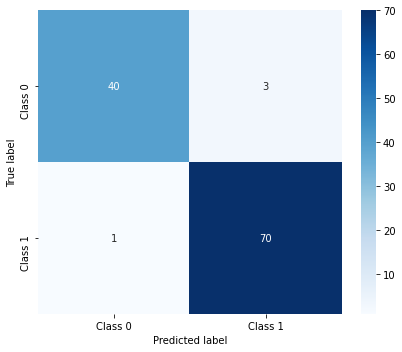

In [140]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

In [141]:
def bayes_predict_ratio(X_test, means, variances, priors):
    posteriors = []
    for x in X_test:
        probabilities = {}
        for c in priors.keys():
            likelihood = 1
            for i in range(len(x)):
                feature_likelihood = cal_likelihood(x[i], means[c][i], variances[c][i])
                likelihood *= feature_likelihood
            
            posterior = likelihood * priors[c]
           
            if c == 0:
                posterior *=30

            probabilities[c] = posterior
    
        posteriors.append(max(probabilities, key=probabilities.get))
    return posteriors

priors = prior(y_train)
means = {}
variances={}
for c in priors:
    means[c] = mean( x_train[y_train == c])
for c in priors:
    variances[c] =variance(x_train[y_train == c],means[c])
y_pred = bayes_predict_ratio(x_test, means, variances, priors)

accuracy =cal_accuracy(y_test, y_pred)
print("accuracy:"+str(accuracy))



accuracy:0.9736842105263158


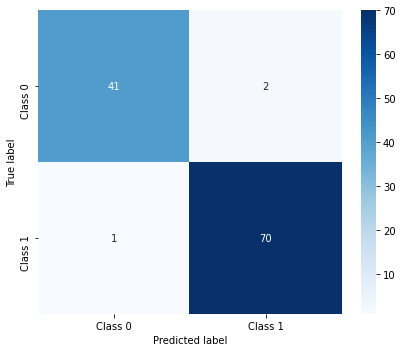

In [142]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

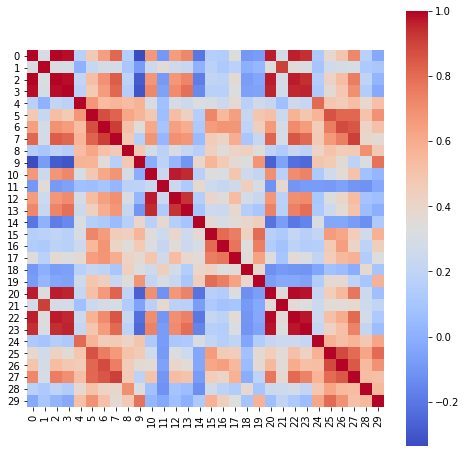

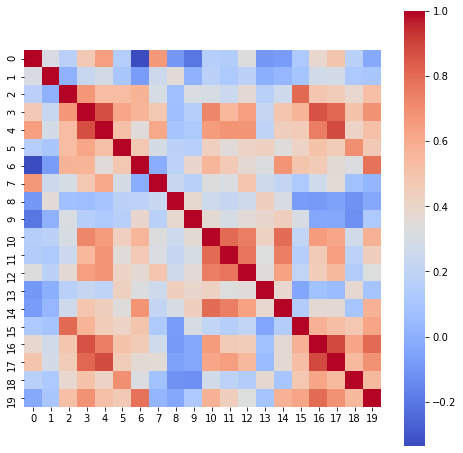

0.9210526315789473


In [143]:
correlation_matrix = np.corrcoef(x_train.T)
plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", square=True)
plt.show()

def remove_dependent(corr_matrix, threshold=0.9):
    columns_to_drop = set()
    for i in range(len(corr_matrix)):
        for j in range(i + 1, len(corr_matrix)):
            if abs(corr_matrix[i][j]) > threshold:  
                columns_to_drop.add(j)  
    return list(columns_to_drop)

dependent_features = remove_dependent(corr_matrix, threshold=0.9)

x_independent = np.delete(standardized_x, dependent_features, axis=1)
x_train, x_test, y_train, y_test = train_test_split(x_independent, y, test_size=0.2, random_state=42)
correlation_matrix2 = np.corrcoef(x_train.T)
plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix2, annot=False, cmap="coolwarm", square=True)
plt.show()
priors = prior(y_train)
means = {}
variances={}

for c in priors:
    means[c] = mean( x_train[y_train == c])
for c in priors:
    variances[c] =variance(x_train[y_train == c],means[c])
y_pred = bayes_predict(x_test, means, variances, priors)

accuracy = cal_accuracy(y_test, y_pred)
print(accuracy)